In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [28]:
trainData = pd.read_csv("/kaggle/input/playground-series-s3e18/train.csv")
testData = pd.read_csv("/kaggle/input/playground-series-s3e18/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e18/sample_submission.csv")

In [29]:
trainData.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [30]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [31]:
trainData.isnull().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [32]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9893 non-null   int64  
 1   BertzCT            9893 non-null   float64
 2   Chi1               9893 non-null   float64
 3   Chi1n              9893 non-null   float64
 4   Chi1v              9893 non-null   float64
 5   Chi2n              9893 non-null   float64
 6   Chi2v              9893 non-null   float64
 7   Chi3v              9893 non-null   float64
 8   Chi4n              9893 non-null   float64
 9   EState_VSA1        9893 non-null   float64
 10  EState_VSA2        9893 non-null   float64
 11  ExactMolWt         9893 non-null   float64
 12  FpDensityMorgan1   9893 non-null   float64
 13  FpDensityMorgan2   9893 non-null   float64
 14  FpDensityMorgan3   9893 non-null   float64
 15  HallKierAlpha      9893 non-null   float64
 16  HeavyAtomMolWt     9893 

In [33]:
testData.isnull().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
dtype: int64

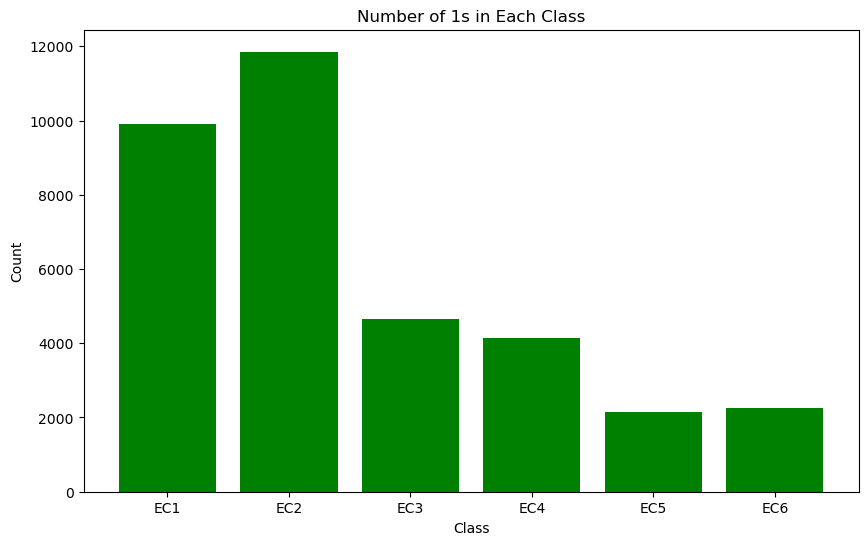

In [41]:
import matplotlib.pyplot as plt
# Define the labels
labels = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']

# Count the number of 1s in each class
counts = [trainData[label].sum() for label in labels]

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(labels, counts, color='green')
plt.title('Number of 1s in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [42]:
# Column names in the DataFrame
columns = list(trainData.columns)

# Remove 'EC1' to 'EC6' and 'id'
features = [col for col in columns if col not in ['id', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']]

print(features)

['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex', 'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9', 'fr_COO', 'fr_COO2']


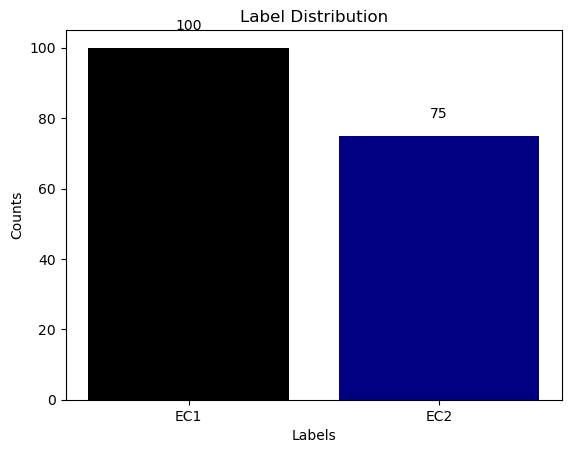

In [43]:
import matplotlib.pyplot as plt

# Data for the bar plot
labels = ['EC1', 'EC2']
counts = [100, 75]  # Example values, you should replace them with your own data

plt.bar(labels, counts, color=['black', 'navy'])


# Add labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center')

# Add a title and axis labels
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Counts')

# Display the bar plot
plt.show()

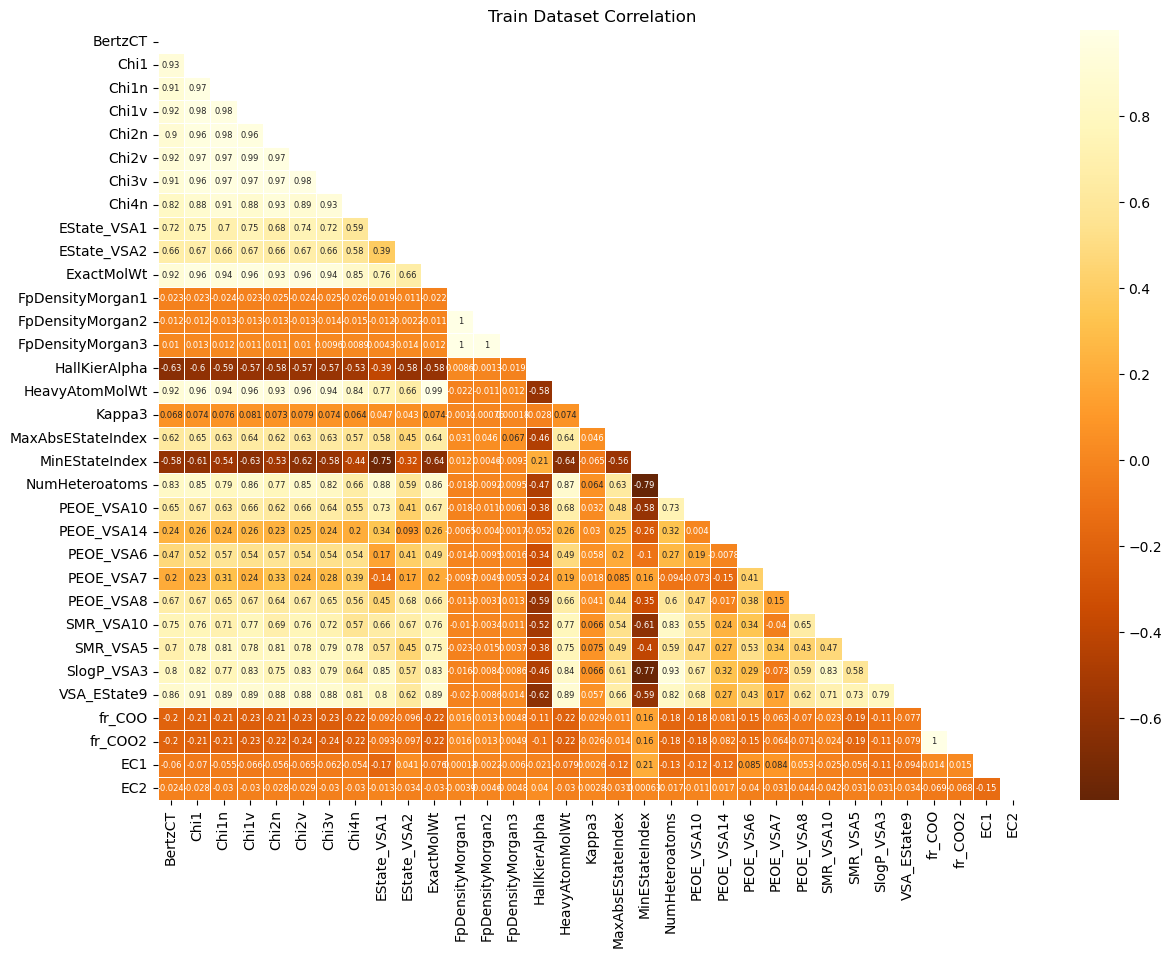

In [45]:
import seaborn as sns
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str = 'Train correlation') -> None:
    # create excluded list
    excluded_columns = ['id', 'EC3', 'EC4', 'EC5', 'EC6']
    
    # Create a list of columns excluding the excluded_columns.
    columns_without_excluded = [col for col in df.columns if col not in excluded_columns]
    
    corr = df[columns_without_excluded].corr()
    fig, axes = plt.subplots(figsize=(14, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrBr_r', annot=True, annot_kws={"size": 6})
    plt.title(title_name)
    plt.show()

plot_correlation_heatmap(trainData[columns], 'Train Dataset Correlation')

In [46]:
train = trainData.drop(labels=['id','EC2','EC3','EC4','EC5','EC6','SMR_VSA10','HallKierAlpha','FpDensityMorgan3','FpDensityMorgan2','FpDensityMorgan1','Kappa3','fr_COO','fr_COO2','EState_VSA2'], axis=1)
test = testData.drop(labels=['id','SMR_VSA10','HallKierAlpha','FpDensityMorgan3','FpDensityMorgan2','FpDensityMorgan1','Kappa3','fr_COO','fr_COO2','EState_VSA2'], axis=1)

In [47]:
X = train.loc[:,'BertzCT':'VSA_EState9']
y = train.loc[:, ['EC1']]

In [48]:
test.shape

(9893, 22)

In [49]:
y

,EC1
0,1
1,0
2,1
3,1
4,1
...,...
14833,1
14834,0
14835,1
14836,0


In [50]:
X

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,ExactMolWt,...,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA5,SlogP_VSA3,VSA_EState9
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,222.068080,...,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,0.000000,4.794537,35.527357
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,260.029719,...,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,30.705892,13.825658,44.707310
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,382.131027,...,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,73.143616,17.964475,45.660120
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,530.070277,...,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,62.107304,31.961948,87.509997
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,118.062994,...,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,18.883484,9.589074,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,347.063084,...,-5.077909,16,17.248535,15.645394,0.000000,13.847474,6.923737,32.607024,18.947452,61.376610
14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,74.024203,...,0.250000,0,0.000000,0.000000,0.000000,0.000000,6.066367,6.420822,0.000000,10.000000
14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,297.089560,...,-0.446105,8,34.480943,0.000000,0.000000,0.000000,23.762553,0.000000,0.000000,66.666667
14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,265.959270,...,-4.181527,7,0.000000,7.822697,19.420579,0.000000,0.000000,108.961047,9.088795,45.583333


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
x_train.shape

(10386, 22)

In [52]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.fit_transform(x_train)
x_test_mms = mms.transform(x_test)

In [53]:
from sklearn.impute import SimpleImputer

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the train dataframe
train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Apply imputation to the test dataframe
test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [54]:
#Feature Extraction
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pca.fit_transform(x_train_sc,y_train)
x_test_pca = pca.transform(x_test_sc)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

percep :- 0.6109613656783468
LR :- 0.6929469901168014
SVC :- 0.7023809523809523
DTC :- 0.6915992812219227
KNN :- 0.6700359389038635
GNB :- 0.6540880503144654
percep :- 0.02129530906677246
LR :- 0.09293341636657715
SVC :- 8.361072778701782
DTC :- 0.10062170028686523
KNN :- 0.26314640045166016
GNB :- 0.011136054992675781


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 6 artists>

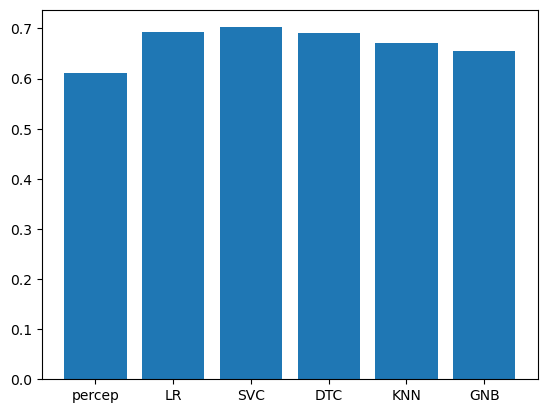

In [55]:
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
clf1 = Perceptron(alpha=0.001,l1_ratio=0.2,max_iter=100)
clf2 = LogisticRegression(penalty='l2',tol=0.001,C=1.0,max_iter=10000)
clf3 = SVC(C=1.0,kernel='rbf')
clf4 = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
clf5 = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
clf6 = GaussianNB(priors=None)
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_name=['percep','LR','SVC','DTC','KNN','GNB']
acc={}
T={}
import time
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf,clf_name):
    st=time.time()
    model.fit(x_train_pca,y_train)
    pred=model.predict(x_test_pca)
    et=time.time()
    acc[model_name]=accuracy_score(pred,y_test)
    T[model_name]=et-st
for i,j in acc.items():
    print(i,':-',j)
for i,j in T.items():
    print(i,':-',j)
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())

/tmp/ipykernel_32/941108163.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  emodel.fit(x_train_sc,y_train)
/tmp/ipykernel_32/941108163.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  emodel.fit(x_train_sc,y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/si

RF :- 0.7028301886792453
ET :- 0.681266846361186
BAG :- 0.6574573225516622
ADA :- 0.6978885893980233
GBC :- 0.616576819407008
VOTING :- 0.6740790655884995
RF :- 1.3760597705841064
ET :- 0.46066856384277344
BAG :- 1.637430191040039
ADA :- 1.0822625160217285
GBC :- 20.13771629333496
VOTING :- 23.35272479057312


<BarContainer object of 6 artists>

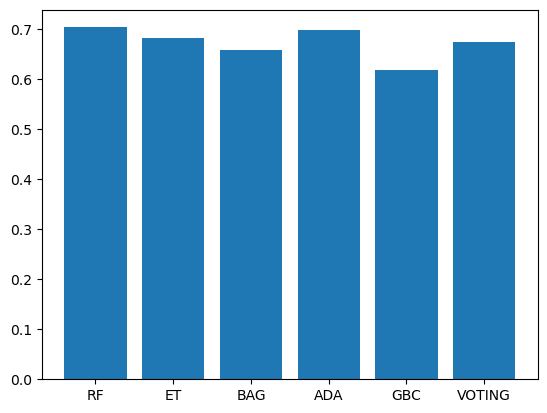

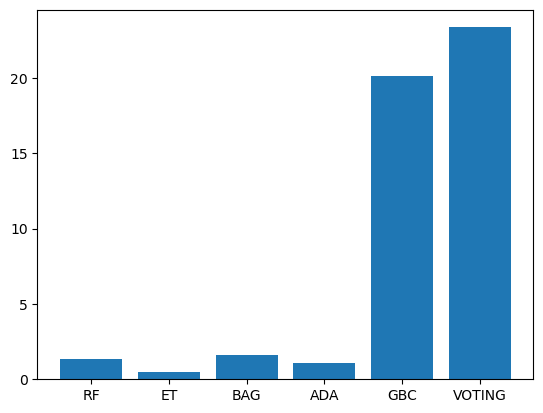

In [56]:

# bagging
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
eclf1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
eclf2=ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=5)
eclf3=BaggingClassifier(n_estimators=10,max_samples=1.0,max_features=1.0,
                      bootstrap=True) #base_estimator=knn
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
eclf4=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)#base_estimator=knn
eclf5=GradientBoostingClassifier(n_estimators=50,learning_rate=1.0,max_depth=None)
from sklearn.ensemble import VotingClassifier
eclf6=VotingClassifier(estimators=[('rf',eclf1),('et',eclf2),('bag',eclf3),('ada',eclf4),
                                 ('gbc',eclf5)], voting='soft',weights=[1,1,1,1,1])
eclf=[eclf1,eclf2,eclf3,eclf4,eclf5,eclf6]
eclf_name=['RF','ET','BAG','ADA','GBC','VOTING']
acc={}
T={}#
import time#
from sklearn.metrics import accuracy_score
for emodel,emodel_name in zip(eclf,eclf_name):
    st=time.time()#
    emodel.fit(x_train_sc,y_train)
    epred=emodel.predict(x_test_sc)
    et=time.time()#
    acc[emodel_name]=accuracy_score(epred,y_test)
    T[emodel_name]=et-st#
for i,j in acc.items():
    print(i,':-',j)
for i,j in T.items(): #
    print(i,':-',j) #
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())
plt.figure()
plt.bar(T.keys(),T.values())

In [57]:
x_train.shape


(10386, 22)

In [58]:
train.shape

(14838, 23)

In [59]:
test.shape

(9893, 22)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   ExactMolWt         14838 non-null  float64
 10  HeavyAtomMolWt     14838 non-null  float64
 11  MaxAbsEStateIndex  14838 non-null  float64
 12  MinEStateIndex     14838 non-null  float64
 13  NumHeteroatoms     14838 non-null  int64  
 14  PEOE_VSA10         14838 non-null  float64
 15  PEOE_VSA14         14838 non-null  float64
 16  PEOE_VSA6          148

In [61]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [62]:
y_pred = xgb_model.predict(X)

In [63]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [64]:
ec1_preds = xgb_model.predict_proba(test)[:,1]

In [66]:
train = trainData.drop(labels=['id','EC1','EC3','EC4','EC5','EC6','EState_VSA1','PEOE_VSA10','FpDensityMorgan3','FpDensityMorgan2','FpDensityMorgan1','MinEStateIndex','Kappa3'], axis=1)
test = testData.drop(labels=['id','EState_VSA1','PEOE_VSA10','FpDensityMorgan3','FpDensityMorgan2','FpDensityMorgan1','MinEStateIndex','Kappa3'], axis=1)

In [67]:
X = train.loc[:,'BertzCT':'fr_COO2']
y_ec2 = train.loc[:, ['EC2']]
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y_ec2,test_size=0.3,random_state=42)
x_train1.shape

(10386, 24)

In [68]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train1)
x_train_sc1=sc.fit_transform(x_train1)
x_test_sc1 = sc.transform(x_test1)

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train1)
x_train_mms1=mms.fit_transform(x_train1)
x_test_mms1 = mms.transform(x_test1)

In [69]:
from sklearn.impute import SimpleImputer

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the train dataframe
train_imputed = pd.DataFrame(imputer.fit_transform(x_train1), columns=x_train1.columns)

# Apply imputation to the test dataframe
test_imputed = pd.DataFrame(imputer.transform(x_test1), columns=x_test1.columns)

In [70]:
#Feature Extraction
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca1 = pca.fit_transform(x_train_sc1,y_train1)
x_test_pca1 = pca.transform(x_test_sc1)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

percep :- 0.7432614555256065
LR :- 0.804806828391734
SVC :- 0.8054806828391734
DTC :- 0.8030098831985625
KNN :- 0.7619047619047619
GNB :- 0.7994159928122192
percep :- 0.016122817993164062
LR :- 0.10851287841796875
SVC :- 10.517632722854614
DTC :- 0.11618280410766602
KNN :- 0.3460063934326172
GNB :- 0.009627819061279297


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 6 artists>

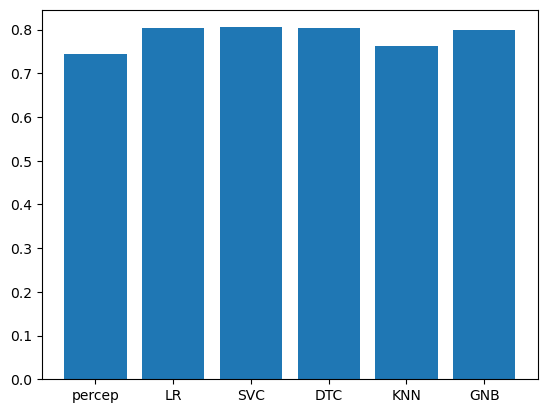

In [71]:
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
clf1_ec2 = Perceptron(alpha=0.001,l1_ratio=0.2,max_iter=100)
clf2_ec2 = LogisticRegression(penalty='l2',tol=0.001,C=1.0,max_iter=10000)
clf3_ec2 = SVC(C=1.0,kernel='rbf')
clf4_ec2 = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
clf5_ec2 = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
clf6_ec2 = GaussianNB(priors=None)
clf_ec2=[clf1_ec2,clf2_ec2,clf3_ec2,clf4_ec2,clf5_ec2,clf6_ec2]
clf_name_ec2=['percep','LR','SVC','DTC','KNN','GNB']
acc={}
T={}
import time
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf_ec2,clf_name_ec2):
    st=time.time()
    model.fit(x_train_pca1,y_train1)
    pred1=model.predict(x_test_pca1)
    et=time.time()
    acc[model_name]=accuracy_score(pred1,y_test1)
    T[model_name]=et-st
for i,j in acc.items():
    print(i,':-',j)
for i,j in T.items():
    print(i,':-',j)
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())

/tmp/ipykernel_32/2084203549.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  emodel.fit(x_train_sc1,y_train1)
/tmp/ipykernel_32/2084203549.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  emodel.fit(x_train_sc1,y_train1)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3

RF :- 0.8054806828391734
ET :- 0.8054806828391734
BAG :- 0.7508984725965858
ADA :- 0.8050314465408805
GBC :- 0.7008086253369272
VOTING :- 0.798292902066487
RF :- 1.279965877532959
ET :- 0.46628332138061523
BAG :- 1.9015755653381348
ADA :- 1.145409107208252
GBC :- 17.214199542999268
VOTING :- 23.069434642791748


<BarContainer object of 6 artists>

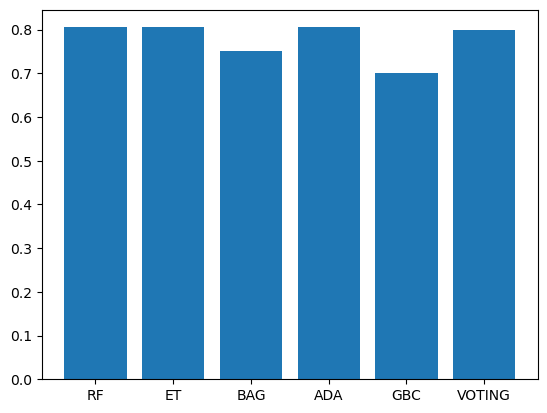

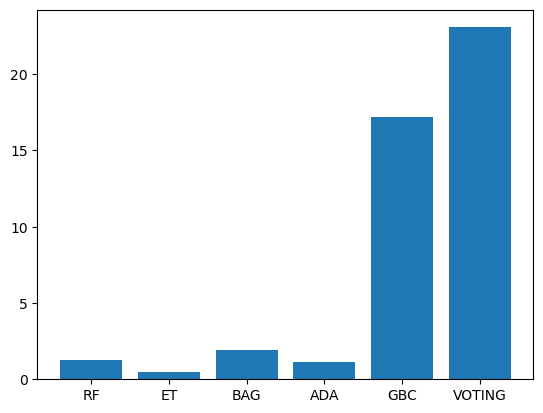

In [72]:
# bagging
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
eclf1_ec2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5)
eclf2_ec2=ExtraTreesClassifier(n_estimators=100,criterion='gini',max_depth=5)
eclf3_ec2=BaggingClassifier(n_estimators=10,max_samples=1.0,max_features=1.0,
                      bootstrap=True) #base_estimator=knn
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
eclf4_ec2=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)#base_estimator=knn
eclf5_ec2=GradientBoostingClassifier(n_estimators=50,learning_rate=1.0,max_depth=None)
from sklearn.ensemble import VotingClassifier
eclf6_ec2=VotingClassifier(estimators=[('rf',eclf1_ec2),('et',eclf2_ec2),('bag',eclf3_ec2),('ada',eclf4_ec2),
                                 ('gbc',eclf5_ec2)], voting='soft',weights=[1,1,1,1,1])
eclf1=[eclf1_ec2,eclf2_ec2,eclf3_ec2,eclf4_ec2,eclf5_ec2,eclf6_ec2]
eclf_name1=['RF','ET','BAG','ADA','GBC','VOTING']
acc={}
T={}#
import time#
from sklearn.metrics import accuracy_score
for emodel,emodel_name in zip(eclf1,eclf_name1):
    st=time.time()#
    emodel.fit(x_train_sc1,y_train1)
    epred_ec2=emodel.predict(x_test_sc1)
    et=time.time()#
    acc[emodel_name]=accuracy_score(epred_ec2,y_test1)
    T[emodel_name]=et-st#
for i,j in acc.items():
    print(i,':-',j)
for i,j in T.items(): #
    print(i,':-',j) #
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())
plt.figure()
plt.bar(T.keys(),T.values())

In [73]:
import xgboost as xgb

# Initialize the XGBoost model with adjusted hyperparameters
xgb_model_ec2 = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=3,
    learning_rate=0.01,
    max_depth=10,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.01,
    reg_lambda=0.01
)

# Fit the model with the updated hyperparameters
xgb_model_ec2.fit(X, y_ec2)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=3, ...)

In [74]:
y_pred_ec2 = xgb_model.predict(x_test)

In [75]:
y_pred_ec2

array([1, 0, 1, ..., 1, 1, 1])

In [76]:
ec2_acuu = accuracy_score(y_pred_ec2,y_test1)
ec2_acuu

0.5968104222821204

In [77]:
ec2_preds = xgb_model_ec2.predict_proba(test)[:,1]

In [78]:
ec2_preds

array([0.7229244 , 0.83898085, 0.7009208 , ..., 0.8379948 , 0.88880646,
       0.8510759 ], dtype=float32)

In [79]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')

In [80]:
sub.head()

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5


In [81]:
sub['EC1'] = ec1_preds
sub['EC2'] = ec2_preds

In [82]:
sub.to_csv('submission.csv', index=False)